In [30]:
import context
import matplotlib.pyplot as plt
from torch.fft import fftn, ifftn, ifftshift, fftshift
from utils.datasets import Cifar10Dataset
import torch
from torch.utils.data import DataLoader

ds = Cifar10Dataset("./data/")
dl = DataLoader(ds, batch_size=len(ds))

Files already downloaded and verified


In [18]:
x, y = next(iter(dl))

In [20]:
x_singlechannel = torch.mean(x, dim=1)

In [21]:
x_flat = x_singlechannel.squeeze().view(len(ds), -1)

In [22]:
cov = torch.cov(x_flat.T)

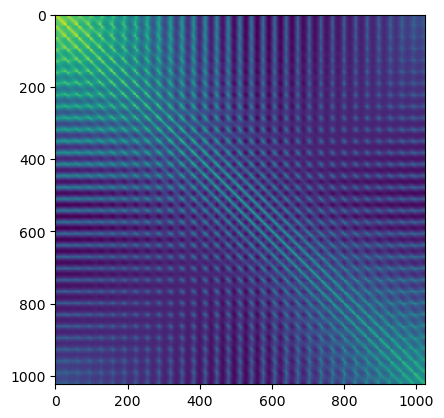

In [26]:
plt.imshow(cov)

In [27]:
mean = torch.mean(x_singlechannel, dim=0)

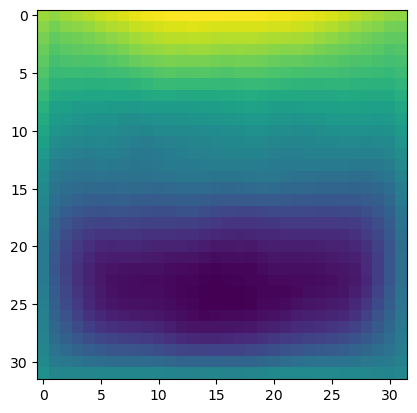

In [28]:
plt.imshow(mean)

In [31]:
def to_kspace(x):
    x = fftn(x, dim=(-2,-1))
    return fftshift(x, dim=(-2,-1))

In [32]:
k_singlechannel = to_kspace(x_singlechannel)

In [33]:
mean_k = torch.mean(k_singlechannel, dim=0)

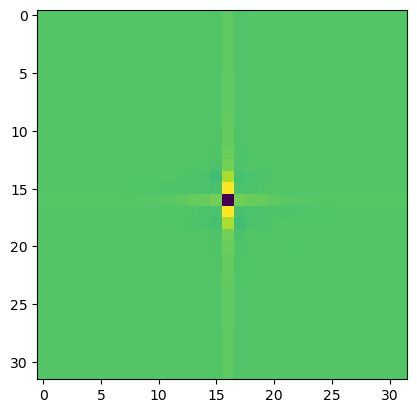

In [36]:
plt.imshow(torch.real(mean_k))

In [37]:
k_flat = k_singlechannel.squeeze().view(len(ds), -1)

In [38]:
cov_k = torch.cov(k_flat.T)

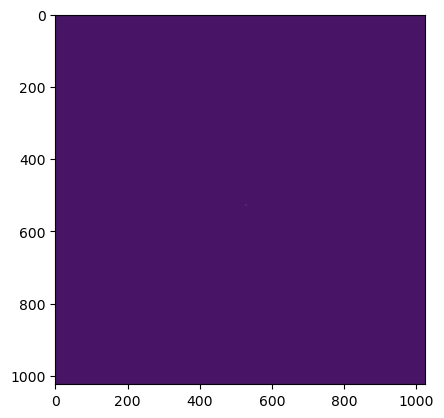

In [44]:
plt.imshow(torch.real(cov_k))